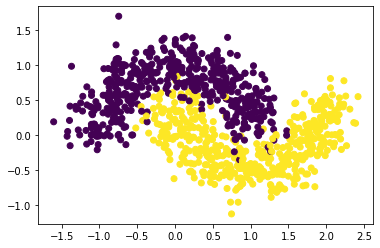

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=1)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [13]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [14]:
def predict(X, weights):
    return sigmoid(np.dot(X,weights))

In [15]:
def loss(X, Y, weights):
    Y_ = predict(X, weights)
    cost = np.mean(-Y*np.log(Y_)-(1.0-Y)*np.log(1.0-Y_))
    return cost

In [16]:
def update(X, Y, weights, learning_rate):
    Y_ = predict(X, weights)
    dw = np.dot(X.T, Y_ - Y)
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

In [17]:
def train(X, Y, learning_rate=0.5, maxEpochs=1000):
    ones = np.ones((X.shape[0],1))
    X = np.hstack([ones,X])
    weights = np.zeros(X.shape[1])

    for epoch in range(maxEpochs):
        weights = update(X, Y, weights, learning_rate)
        if(epoch%10==0):
            print('Epoch:',epoch,'Loss:',loss(X, Y, weights))
    
    return weights

In [18]:
weights = train(X,Y)

Epoch: 0 Loss: 0.648066443507481
Epoch: 10 Loss: 0.457521111084274
Epoch: 20 Loss: 0.4005054704674935
Epoch: 30 Loss: 0.37293385933948864
Epoch: 40 Loss: 0.3562129892717362
Epoch: 50 Loss: 0.34472087621141445
Epoch: 60 Loss: 0.33621751060921146
Epoch: 70 Loss: 0.32963092554827805
Epoch: 80 Loss: 0.32437452699249797
Epoch: 90 Loss: 0.32009284125565524
Epoch: 100 Loss: 0.3165529836588023
Epoch: 110 Loss: 0.31359312793360744
Epoch: 120 Loss: 0.31109577633722973
Epoch: 130 Loss: 0.3089727899353328
Epoch: 140 Loss: 0.30715642189370396
Epoch: 150 Loss: 0.3055936242770037
Epoch: 160 Loss: 0.3042422512367847
Epoch: 170 Loss: 0.30306842302829634
Epoch: 180 Loss: 0.3020446362353052
Epoch: 190 Loss: 0.3011483742530066
Epoch: 200 Loss: 0.30036106505016097
Epoch: 210 Loss: 0.2996672869209279
Epoch: 220 Loss: 0.2990541553675862
Epoch: 230 Loss: 0.29851084468658085
Epoch: 240 Loss: 0.2980282111983086
Epoch: 250 Loss: 0.2975984940985394
Epoch: 260 Loss: 0.2972150761889582
Epoch: 270 Loss: 0.2968722912

In [19]:
def getPredictions(X_Test, weights, labels=True):
    if X_Test.shape[0]!=weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack([ones,X_Test])

    probs = predict(X_Test, weights)
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [20]:
x1 = np.linspace(-2,2,10)
x2 = -(weights[0]+weights[1]*x1)/weights[2]

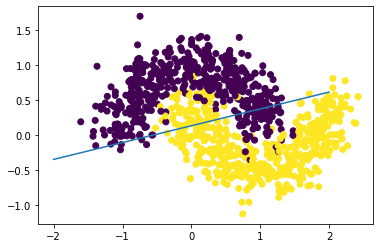

In [21]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(x1,x2)
plt.show()

In [22]:
Y_ = getPredictions(X,weights,labels=True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

0.869
